In [61]:
from modules.attunet import AttentionU_Net
from modules.dataset import Dataset
from modules.preprocess import preprocess_data
from modules.visualisation import visualize_masks

import random
import torch
from torchvision import transforms

In [62]:
data_path = "./data"
preprocess_data_path = './data'
saved_model_path = "./model/attunet_brain_tumor_segm.pth"
output_path = './out/'

In [63]:
image_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229]),
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

In [64]:
#Uncomment to preprocess the data
# preprocess_data(main_path + '/test', preprocess_data_path + '/test')
test_dataset = Dataset(preprocess_data_path + '/test_prep', transform=image_transform)

In [65]:
model = AttentionU_Net(1,1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.load_state_dict(torch.load(saved_model_path, map_location = device))
model.eval()
print() # for no spam from model.eval()

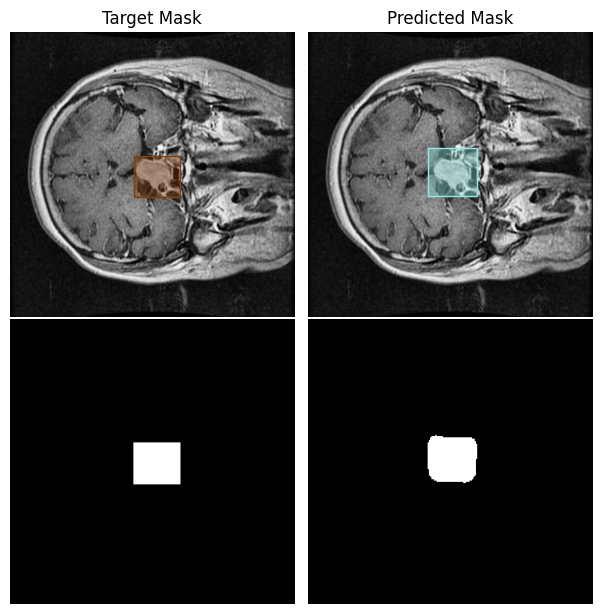

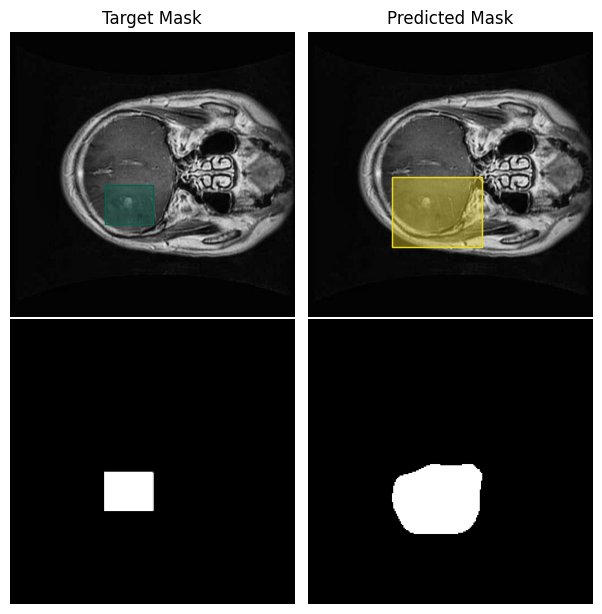

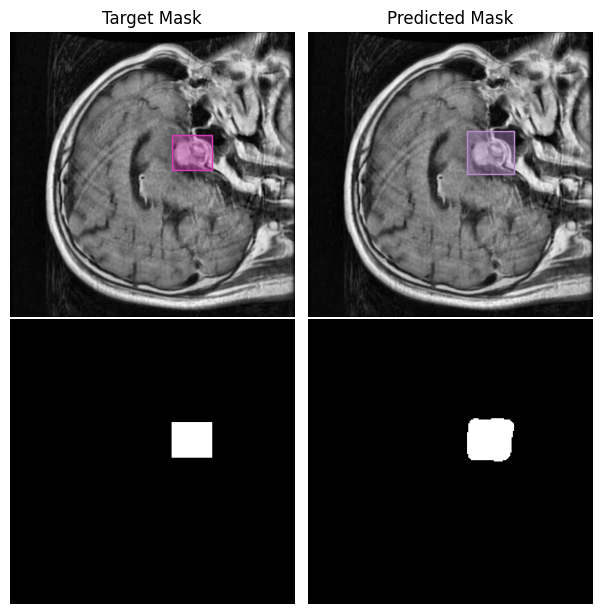

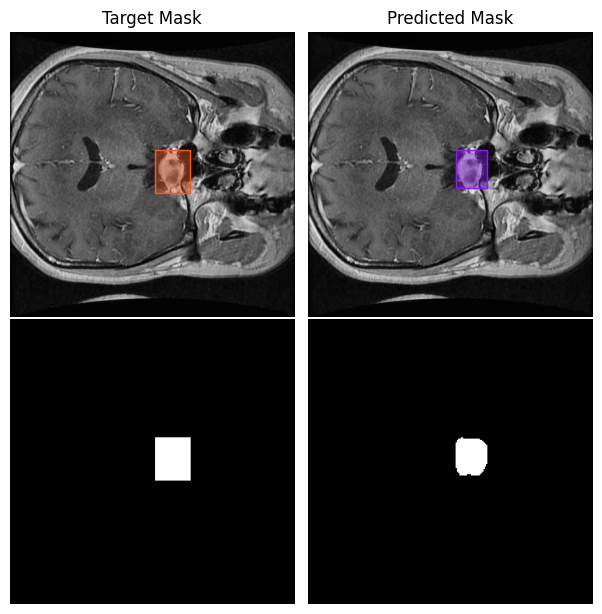

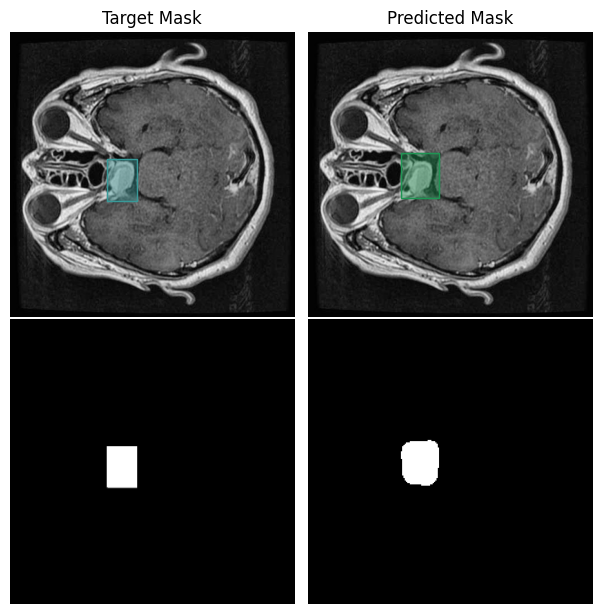

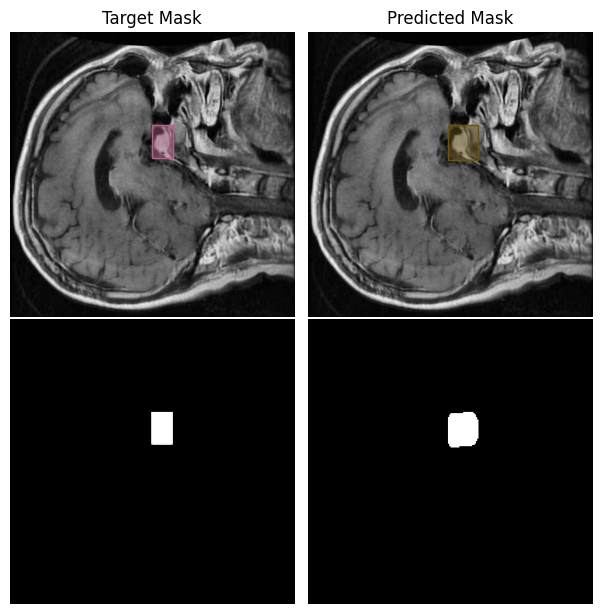

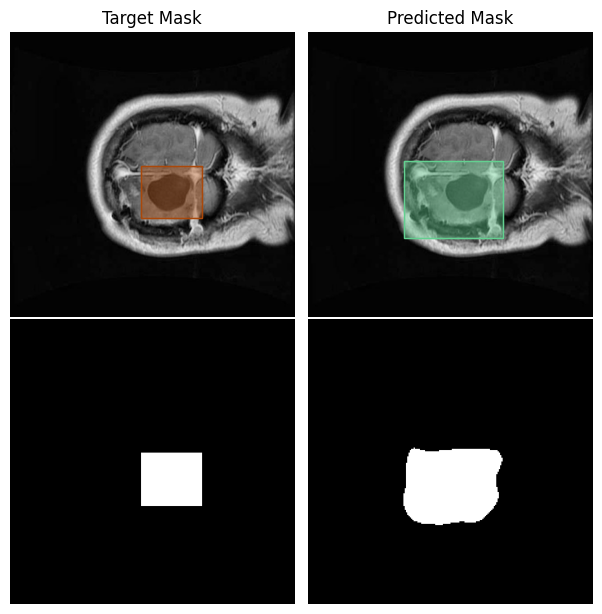

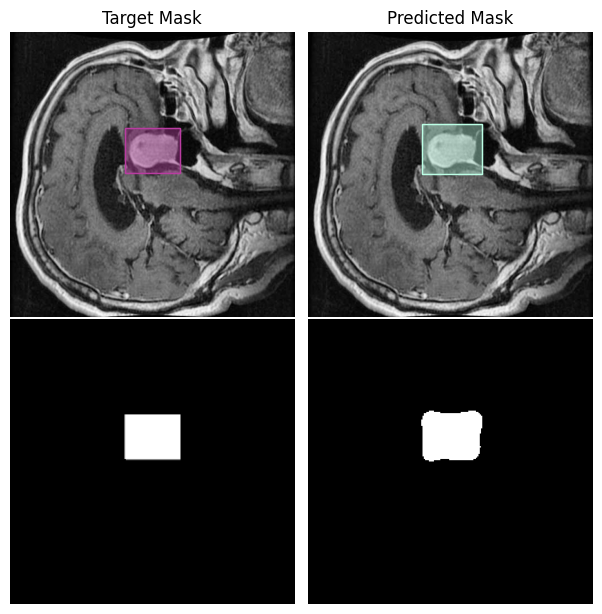

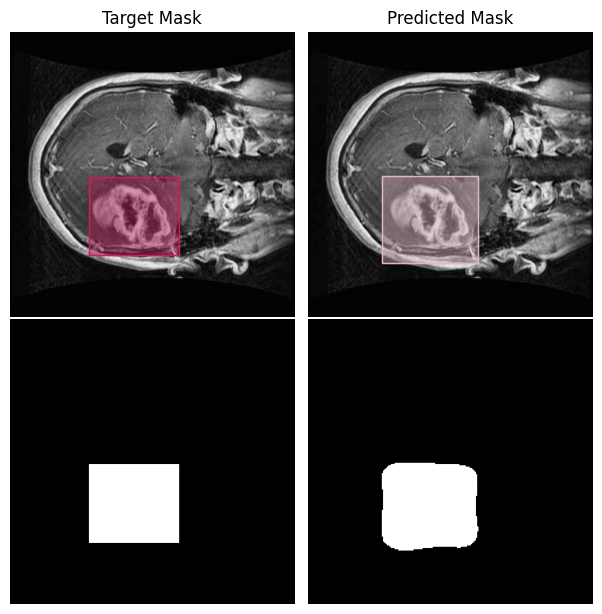

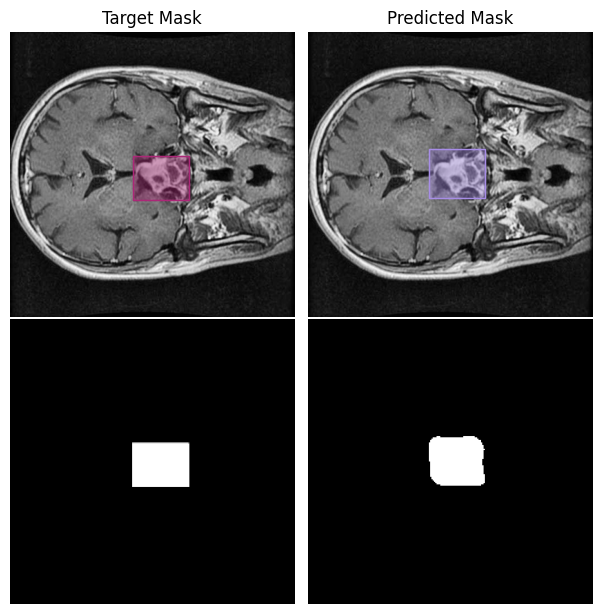

In [66]:
for i in range(10):
    x, y, original = test_dataset.getWithOriginalImage(random.choice(range(len(test_dataset))))

    x = x[:, None, :, :]

    x = x.to(device,dtype = torch.float32)
    y = y.to(device,dtype = torch.float32)

    pred = model(x)
    y_pred = (pred>0.5).float()

    visualize_masks(original, y_pred, y, output_path + '/output_'+ str(i) +'.png')